<a href="https://colab.research.google.com/github/ArtisVansovics/loan_data_analysis/blob/main/loan_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Application Risk Assesment

## Introduction
A data set of 10 000 historical loan application samples is provided. By using the data set a classification model is built in order to predict, if a new client will default or pay back the loan.

The target variable for the model is *First Payment Delay 30 days* (**fdp30**). Value of 1 means that the client defaulted, by not being able to pay back the loan in less than 30 days from the designated loan repayment period. O means that the client was able to repay the loan in time.

## Loading the data

In [24]:
import numpy as np
import pandas as pd
import os


# Imports to set up plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

# Precision of printed numerical values of the Pandas data frame
pd.set_option("display.precision", 2)

In [3]:
# Uploading initial data set

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving all_data_set.csv to all_data_set.csv
User uploaded file "all_data_set.csv" with length 4850772 bytes


In [4]:
# Saving initial data set as a Pandas DataFrame

data_folder = './data/'
csv_name = 'all_data_set.csv'

df = pd.read_csv(f"{data_folder}{csv_name}")

## Checking the data

### Taking a look at the data

In [6]:
df.head()

,r_application_id,app_date,amount,original_amount,term,original_term,commission_charged,gender,dob,email,...,provider_5_device_os,provider_5_device_screen,provider_5_device_type,provider_5_rule_zero,provider_5_rule_one,provider_5_rule_two,provider_5_rule_three,credit_limit,new_income,new_liabilities
0,233991,2018-03-26 13:11:58,1000.0,1000.0,30,30,250,0,1988-10-25,test@wp.pl,...,WINDOWS NT 6.1,1024X1280,WINDOWS,NaN,NaN,NaN,NaN,1000.0,2200.0,200.0
1,234008,2018-03-26 13:26:38,1500.0,2500.0,30,30,375,0,1975-11-22,test@wp.pl,...,WINDOWS NT 10.0,768X1366,WINDOWS,NaN,NaN,NaN,NaN,1500.0,5800.0,600.0
2,234010,2018-03-26 13:27:51,300.0,1000.0,30,30,75,1,1995-04-04,test@gmail.com,...,WINDOWS NT 6.1,1080X1920,WINDOWS,NaN,NaN,NaN,NaN,300.0,2350.0,300.0
3,234155,2018-03-26 15:47:22,1500.0,2500.0,30,30,375,1,1983-12-12,test@vp.pl,...,ANDROID 6.0.1,640X360,ANDROID,NaN,NaN,NaN,NaN,1500.0,2600.0,1000.0
4,234006,2018-03-26 13:24:59,400.0,400.0,30,30,100,1,1992-03-10,test@onet.pl,...,ANDROID 7.0,640X360,ANDROID,NaN,NaN,NaN,NaN,1000.0,2100.0,300.0


General information on the data points, including the amount of entries, the data types and how many entries for each data point are not null:

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 84 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   r_application_id                          10000 non-null  int64  
 1   app_date                                  10000 non-null  object 
 2   amount                                    10000 non-null  float64
 3   original_amount                           10000 non-null  float64
 4   term                                      10000 non-null  int64  
 5   original_term                             10000 non-null  int64  
 6   commission_charged                        10000 non-null  int64  
 7   gender                                    10000 non-null  int64  
 8   dob                                       10000 non-null  object 
 9   email                                     10000 non-null  object 
 10  employment_status                  

### Distribution of defaults

In [49]:
fdp30 = pd.DataFrame(df['fpd30'].value_counts())
fdp30

,fpd30
0,8206
1,1794


In [22]:
round(df['fpd30'].mean()*100, 1)

17.9

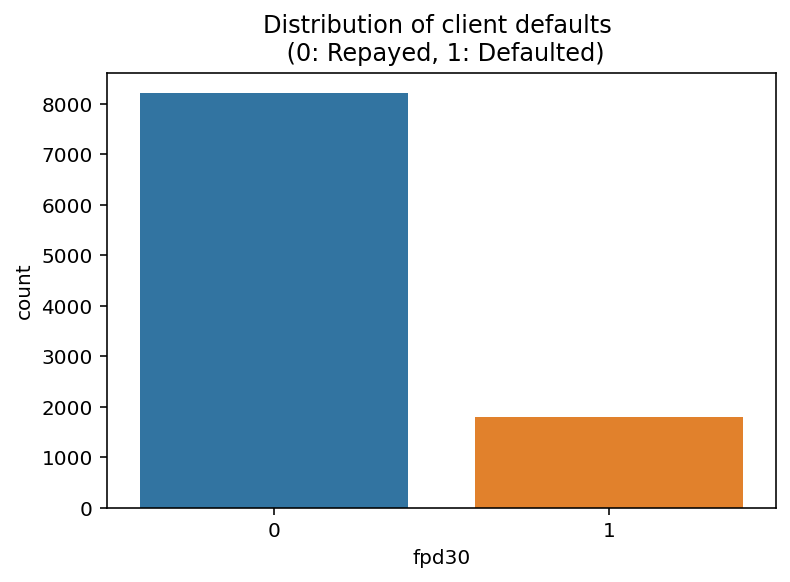

In [47]:
sns.countplot(x='fpd30', data=df)
plt.title('Distribution of client defaults \n (0: Repayed, 1: Defaulted)')
plt.show()

In total 1794 clients or 17.9% defaulted (fpd30 = 1), while 82.1% were able to pay back their loans.